In [1]:
# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable"

Mounted at /content/drive
/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable


In [3]:
# Importar las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [14]:
base_dir = 'Flowers'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Preprocesado de imagenes con ImageDataGenerator
datagen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 20,
          width_shift_range = 0.5,
          height_shift_range = 0.5)

# Create data generators for training and validation sets
train_generator = datagen.flow_from_directory(
          train_dir,
          target_size = (150, 150),
          batch_size = 32,
          class_mode = 'sparse')

validation_generator = datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode = 'sparse')

test_generator = datagen.flow_from_directory(
          test_dir,
          target_size = (150, 150),
          batch_size = 32,
          class_mode = 'sparse')


Found 1514 images belonging to 4 classes.
Found 424 images belonging to 4 classes.
Found 551 images belonging to 4 classes.


In [15]:
# Tomar VGG16 con un modelo base
from tensorflow.keras.applications import VGG16
base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas convolusionales
for layer in base.layers:
    layer.trainable = False

In [16]:
# Creación del modelo
model = models.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15239300 (58.13 MB)
Trainable params: 524612 (2.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

### Entrenamiento

In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = 47, #train_generator.samples / train_generator.batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 13 #validation_generator.samples / validation_generator.batch_size
)

Epoch 1/20
47/47 [==============================] - 31s 605ms/step - loss: 1.2124 - accuracy: 0.4696 - val_loss: 0.9223 - val_accuracy: 0.6731
Epoch 2/20
47/47 [==============================] - 25s 534ms/step - loss: 0.9226 - accuracy: 0.6053 - val_loss: 0.8175 - val_accuracy: 0.7452
Epoch 3/20
47/47 [==============================] - 26s 559ms/step - loss: 0.8432 - accuracy: 0.6505 - val_loss: 0.6744 - val_accuracy: 0.7356
Epoch 4/20
47/47 [==============================] - 28s 593ms/step - loss: 0.7508 - accuracy: 0.6910 - val_loss: 0.6435 - val_accuracy: 0.7861
Epoch 5/20
47/47 [==============================] - 23s 498ms/step - loss: 0.7601 - accuracy: 0.7011 - val_loss: 0.5912 - val_accuracy: 0.8005
Epoch 6/20
47/47 [==============================] - 25s 538ms/step - loss: 0.7530 - accuracy: 0.6950 - val_loss: 0.6356 - val_accuracy: 0.7812
Epoch 7/20
47/47 [==============================] - 24s 522ms/step - loss: 0.6847 - accuracy: 0.7348 - val_loss: 0.5139 - val_accuracy: 0.8293

In [20]:
'''# Se guarda el modelo
model.save('flowersVGG.h5')'''

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


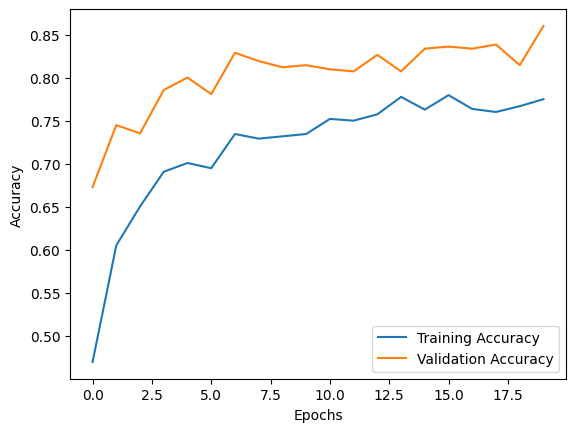

In [21]:
# Grafica del accuracy en train y en validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Pruebas

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
# Realizar predicciones
prediction = model.predict(test_generator)

# Obtener true labels
true_label = test_generator.classes

# Obtener predicted labels
predicted_label = np.argmax(prediction, axis=1)

18/18 [==============================] - 167s 10s/step


In [24]:
# Prueba con los datos de test
test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\nTest accuracy :\n', test_acc)

10/10 [==============================] - 4s 391ms/step - loss: 0.3201 - accuracy: 0.8938

test acc :
 0.893750011920929


In [25]:
# Matriz de confusión
cMatrix = confusion_matrix(true_label, predicted_label)

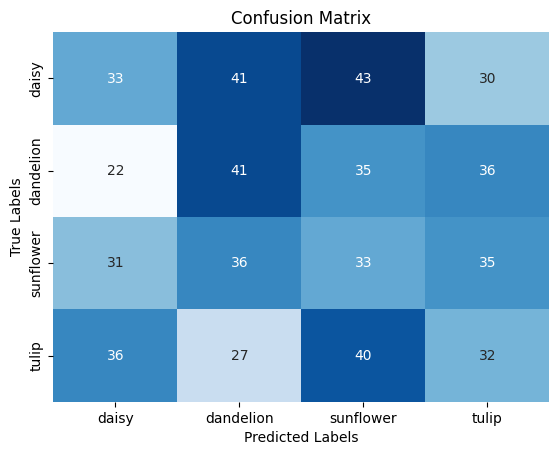

In [28]:
# Grafica de la matriz de confusión
sns.heatmap(cMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()